## Credit EDA case study                           

### Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may 
be used for taking actions such as 
 - denying the loan
 - reducing the amount of loan
 - lending (to risky applicants) at a higher interest rate, etc. 

This will ensure that the consumers capable of repaying the loan are not rejected. 

### Problem Statement 
Identification of such applicants whose loan should not be rejected using EDA is the aim of this case study.
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.


#### Types of decisions that could be taken by the loan provider company:
- Approved: The Company has approved loan Application

- Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

- Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

- Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries such as numpy and pandas packages

import numpy as np
import pandas as pd
#import all the libraries and modules
import seaborn as sns
import matplotlib.pyplot as plt
import re
from scipy import stats
import os

# Analysis approach

### Task 1: Reading and Inspection

-  #### Subtask 1.1: Import and read

-  #### Subtask 1.2: Inspect the dataframe

In [3]:
#Using application_data.csv first (csv should be copied at same location of the notebook)

pd.set_option("display.max_columns",500)              
a_df=pd.read_csv("application_data.csv")

a_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Inspect the dataframe's columns, shapes, variable types etc.

In [4]:
#Total rows an coloumn in allpcation_data.csv data
a_df.shape

(307511, 122)

In [5]:
#other data frame info such as various data type
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
#Describe stats of each coloumn 
a_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## Task 2: Data Quality Check and Missing values
Data Quality Check and Missing values

-  ##### Subtask 2.1: Inspect Null values 
   Find the percentage of missing values for all the columns

-  ##### Subtask 2.2: Drop unecessary columns
    Remove columns with high missing percentage ( more than 30%)

-  ##### Subtask 2.3: Fill NaN values
   For columns which has less percentage(around 13% or so), check what will be the best metric to impute the missing values? 
   For categorical column find which category can use to fill the nulls. 
   For others check if mean/median can be imputed or not. Others cases may be imputing with 0 (for few variables).

-  ##### Subtask 2.4:
   Check the datatypes of all the columns and change the datatype if required

-  ##### Subtask 2.5:
   For numerical columns check for outliers and report them for at-least 3 variables. Treat them and analyse it.

-  ##### Subtask 2.6:
   Binning of continuous variables. Check if it is required to bin any variable in different categories for 1 or 2 columns.

-  ##### Subtask 2.7: 
   Check the number of retained rows

In [7]:
# Subtask 2.1: Inspect Null values
print (round((a_df.isnull().sum() * 100/ len(a_df)),4).sort_values(ascending=False))

COMMONAREA_MEDI                69.8723
COMMONAREA_AVG                 69.8723
COMMONAREA_MODE                69.8723
NONLIVINGAPARTMENTS_MODE       69.4330
NONLIVINGAPARTMENTS_MEDI       69.4330
NONLIVINGAPARTMENTS_AVG        69.4330
FONDKAPREMONT_MODE             68.3862
LIVINGAPARTMENTS_MEDI          68.3550
LIVINGAPARTMENTS_MODE          68.3550
LIVINGAPARTMENTS_AVG           68.3550
FLOORSMIN_MEDI                 67.8486
FLOORSMIN_MODE                 67.8486
FLOORSMIN_AVG                  67.8486
YEARS_BUILD_MEDI               66.4978
YEARS_BUILD_AVG                66.4978
YEARS_BUILD_MODE               66.4978
OWN_CAR_AGE                    65.9908
LANDAREA_MODE                  59.3767
LANDAREA_AVG                   59.3767
LANDAREA_MEDI                  59.3767
BASEMENTAREA_MEDI              58.5160
BASEMENTAREA_AVG               58.5160
BASEMENTAREA_MODE              58.5160
EXT_SOURCE_1                   56.3811
NONLIVINGAREA_MEDI             55.1792
NONLIVINGAREA_AVG        

In [8]:
#Subtask 2.2: Drop unecessary columns

#columns not required for the analysis, drop them first
a_df=a_df.drop(['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','FLAG_OWN_REALTY', 'FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 
             'FLAG_PHONE', 'CNT_FAM_MEMBERS', 'LIVE_REGION_NOT_WORK_REGION', 
               'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE',
               'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
              'DEF_60_CNT_SOCIAL_CIRCLE','FLAG_OWN_CAR'], axis=1)

#Drop colums having higher that 30% null values
clean_a_df = a_df.drop(a_df.columns[a_df.isnull().mean() > 0.30], axis = 1)

clean_a_df.describe()          

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.056720,12.063419,5.143927e-01,0.510853,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.231307,3.265832,1.910602e-01,0.194844,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,0.000000,10.000000,3.924574e-01,0.370650,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,0.000000,12.000000,5.659614e-01,0.535276,-757.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.000000,0.000000,14.000000,6.636171e-01,0.669057,-274.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [9]:
#Check percentage again after dropping the columns
print (round((clean_a_df.isnull().sum() * 100/ len(clean_a_df)),4).sort_values(ascending=False))

EXT_SOURCE_3                  19.8253
AMT_REQ_CREDIT_BUREAU_YEAR    13.5016
AMT_REQ_CREDIT_BUREAU_QRT     13.5016
AMT_REQ_CREDIT_BUREAU_MON     13.5016
AMT_REQ_CREDIT_BUREAU_WEEK    13.5016
AMT_REQ_CREDIT_BUREAU_DAY     13.5016
AMT_REQ_CREDIT_BUREAU_HOUR    13.5016
NAME_TYPE_SUITE                0.4201
EXT_SOURCE_2                   0.2146
AMT_GOODS_PRICE                0.0904
AMT_ANNUITY                    0.0039
DAYS_LAST_PHONE_CHANGE         0.0003
FLAG_DOCUMENT_15               0.0000
FLAG_DOCUMENT_14               0.0000
DAYS_REGISTRATION              0.0000
DAYS_EMPLOYED                  0.0000
DAYS_BIRTH                     0.0000
REGION_POPULATION_RELATIVE     0.0000
NAME_HOUSING_TYPE              0.0000
NAME_FAMILY_STATUS             0.0000
NAME_EDUCATION_TYPE            0.0000
NAME_INCOME_TYPE               0.0000
FLAG_DOCUMENT_19               0.0000
FLAG_DOCUMENT_20               0.0000
FLAG_DOCUMENT_21               0.0000
AMT_CREDIT                     0.0000
AMT_INCOME_T

In [10]:
#perform a check's again
print(clean_a_df.info())
print(clean_a_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
NAME_TYPE_SUITE               306219 non-null object
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
REGION_POPULATION_RELATIVE    307511 non-null float64
DAYS_BIRTH                    307511 non-null int64
DAYS_EMPLOYED                 307511 non

In [11]:
#Subtask 2.3: Impute Fill NaN values for  columns where the %null is 13% or less
#following variables have around 13% null values 
#AMT_REQ_CREDIT_BUREAU_YEAR  ,AMT_REQ_CREDIT_BUREAU_QRT  ,AMT_REQ_CREDIT_BUREAU_MON   ,
#AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY   ,AMT_REQ_CREDIT_BUREAU_HOUR 

#The null values can be imputed like below for all the coloumns.
clean_a_df['AMT_REQ_CREDIT_BUREAU_YEAR'] = clean_a_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(clean_a_df["AMT_REQ_CREDIT_BUREAU_YEAR"].mean())


#Check again the % null values after imputing
print (round((clean_a_df.isnull().sum() * 100/ len(clean_a_df)),4).sort_values(ascending=False))

EXT_SOURCE_3                  19.8253
AMT_REQ_CREDIT_BUREAU_QRT     13.5016
AMT_REQ_CREDIT_BUREAU_MON     13.5016
AMT_REQ_CREDIT_BUREAU_WEEK    13.5016
AMT_REQ_CREDIT_BUREAU_DAY     13.5016
AMT_REQ_CREDIT_BUREAU_HOUR    13.5016
NAME_TYPE_SUITE                0.4201
EXT_SOURCE_2                   0.2146
AMT_GOODS_PRICE                0.0904
AMT_ANNUITY                    0.0039
DAYS_LAST_PHONE_CHANGE         0.0003
DAYS_BIRTH                     0.0000
TARGET                         0.0000
NAME_CONTRACT_TYPE             0.0000
FLAG_EMAIL                     0.0000
FLAG_MOBIL                     0.0000
DAYS_ID_PUBLISH                0.0000
DAYS_REGISTRATION              0.0000
DAYS_EMPLOYED                  0.0000
CODE_GENDER                    0.0000
REGION_POPULATION_RELATIVE     0.0000
CNT_CHILDREN                   0.0000
NAME_FAMILY_STATUS             0.0000
NAME_EDUCATION_TYPE            0.0000
NAME_INCOME_TYPE               0.0000
WEEKDAY_APPR_PROCESS_START     0.0000
AMT_CREDIT  

after impute AMT_REQ_CREDIT_BUREAU_YEAR is removed from the null list

In [12]:
#Subtask 2.4 - check data types

#To do futher analysis create dataframe by casting all numeric continous variables
clean_a_df_num = clean_a_df.select_dtypes(np.number)
clean_a_df_num.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,0,10,0.262949,0.139376,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.000000
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,0,11,0.622246,NaN,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,0,9,0.555912,0.729567,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,0,17,0.650442,NaN,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,1.899974
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,0,11,0.322738,NaN,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000


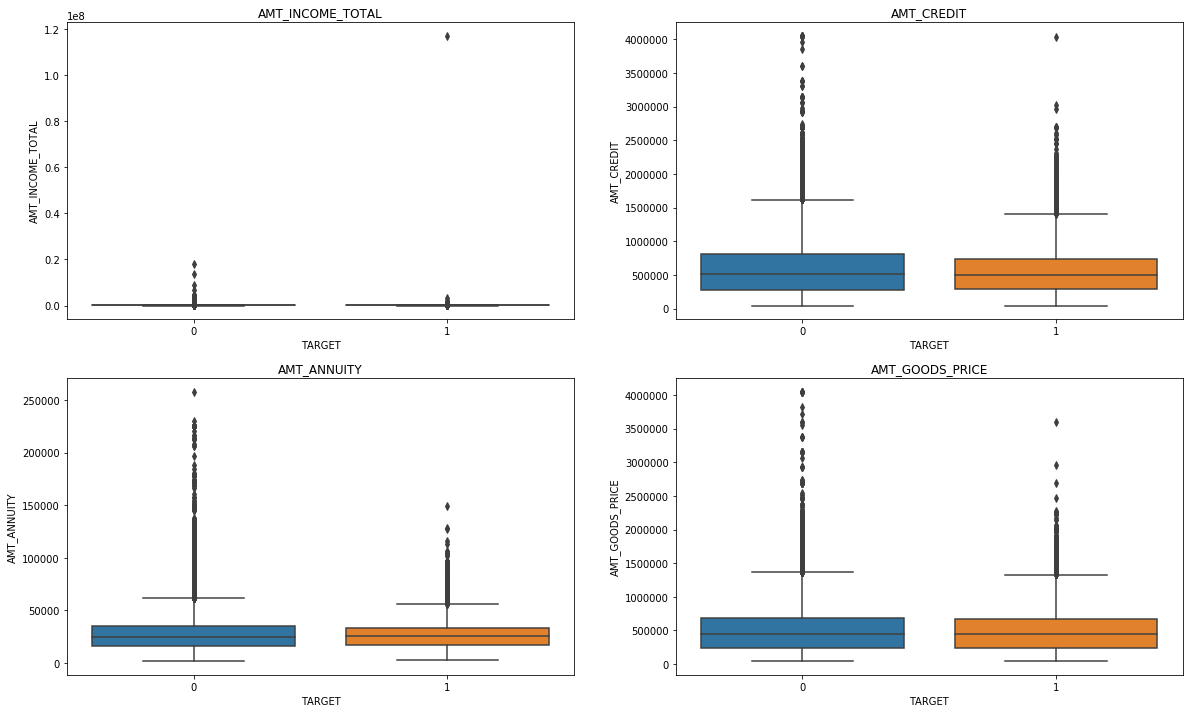

In [13]:
## Subtask 2.5: For numerical columns check for outliers and report them for at-least 3 variables. 
#Treat and analyse them.Here we are checking outliers for following numerical variables againg target (0,1)
#(AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY and AMT_GOODS_PRICE)
def plot_outliers():
    fig, axes = plt.subplots(nrows=2, ncols = 2, figsize=(20,12))

    sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data= clean_a_df, ax=axes[0][0])
    axes[0][0].set_title('AMT_INCOME_TOTAL')

    sns.boxplot(x="TARGET", y="AMT_CREDIT", data= clean_a_df, ax=axes[0][1])
    axes[0][1].set_title('AMT_CREDIT')

    sns.boxplot(x="TARGET", y="AMT_ANNUITY", data= clean_a_df, ax=axes[1][0])
    axes[1][0].set_title('AMT_ANNUITY')

    sns.boxplot(x="TARGET", y="AMT_GOODS_PRICE", data= clean_a_df, ax=axes[1][1])
    axes[1][1].set_title('AMT_GOODS_PRICE')
    
plot_outliers()

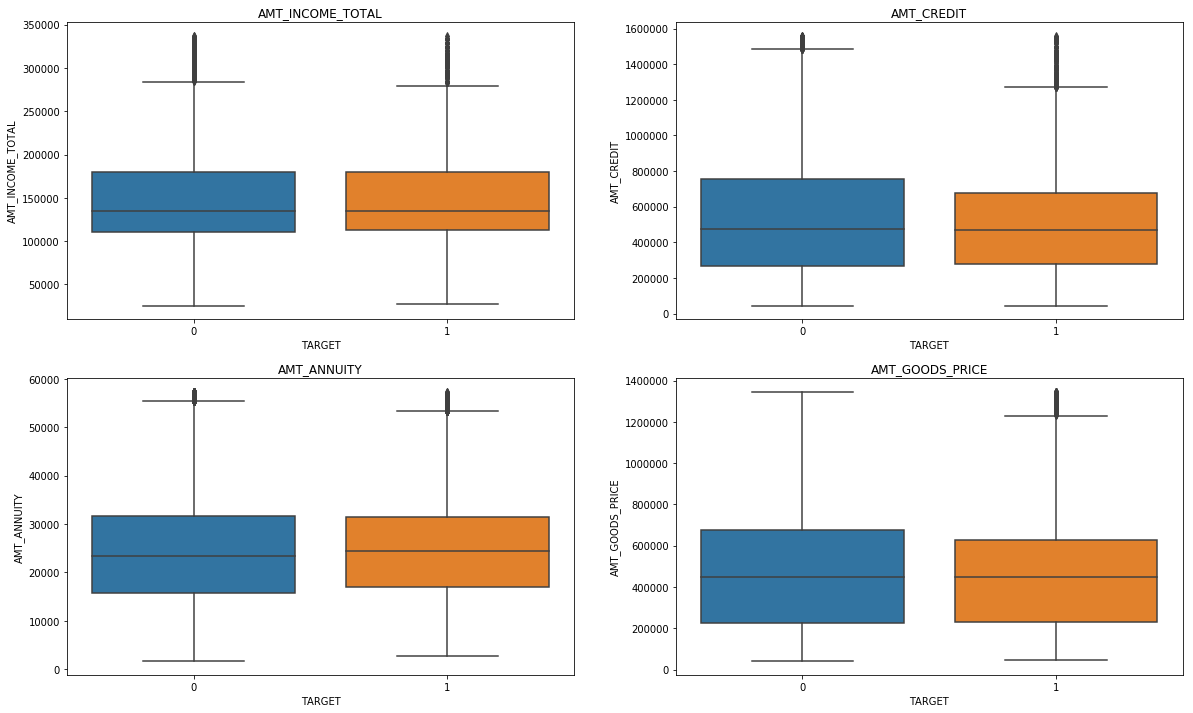

In [14]:
#Treat the outliers using Interquartile range (IQR)
#We are using IQR as an example , Z score can also be used

outliers_var=['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

#Function to calculate Interquartile range
def clean_outlier(temp, col_name):
    Q1  = temp[col_name].quantile(0.25)
    Q3  = temp[col_name].quantile(0.75)
    IQR = Q3-Q1 

    df_3 = temp.loc[(temp[col_name] > (Q1 - 1.5 * IQR)) & (temp[col_name] < (Q3 + 1.5 * IQR))]
    return df_3

for item in outliers_var:
    clean_a_df=clean_outlier(clean_a_df,item)
    
#Plot the outliers again    
plot_outliers()


The graph is much clearer after treating the outliers

In [15]:
#Subtask 2.6:#Binning of continuous variables.

# Age calculation from the column "DAYS_BIRTH".
#Describe stats of each coloumn to start binning


clean_a_df['Age'] = ((clean_a_df['DAYS_BIRTH']*-1)/365)
clean_a_df['Age']= clean_a_df['Age'].astype(int)

print(clean_a_df.Age.describe().apply(lambda x: format(x, 'f')),"\n")

print(clean_a_df.AMT_CREDIT.describe().apply(lambda x: format(x, 'f')),"\n")

print(clean_a_df.AMT_INCOME_TOTAL.describe().apply(lambda x: format(x, 'f')))


count    276211.000000
mean         43.433172
std          12.118172
min          20.000000
25%          33.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: Age, dtype: object 

count     276211.000000
mean      530042.160490
std       318159.962101
min        45000.000000
25%       269550.000000
50%       472500.000000
75%       753840.000000
max      1558813.500000
Name: AMT_CREDIT, dtype: object 

count    276211.000000
mean     149858.080386
std       61032.085769
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      180000.000000
max      337050.000000
Name: AMT_INCOME_TOTAL, dtype: object


In [16]:
#Subtask 2.6:#Binning of continuous variables.

# Age calculation from the column "DAYS_BIRTH".
#Describe stats of each coloumn 


bins=[0,20,30,40,50,60,70]
age_group=['0-20','20-30','30-40','40-50','50-60','60 and above'] # max is 69
clean_a_df['Age_binned'] = pd.cut(clean_a_df['Age'], bins, labels=age_group)

#create bins for credit anount

bins=[0,230000,460000,690000,920000,1150000,1380000,1600000] #'1558813.500000'
range_period=['0-230000','230000-460000','460000-690000','690000-920000','920000-1150000','1150000-1380000','1380000-1610000']
clean_a_df['credit_amount_range']=pd.cut(clean_a_df['AMT_CREDIT'],bins,labels=range_period)


bins=[0,50000,105000,200000,205000,300000,305000,400000]
range_period=['0-50000','50000-105000','105000-200000','200000-205000','205000-300000','300000-305000','305000 and above']
clean_a_df['Income_amount_range']=pd.cut(clean_a_df['AMT_INCOME_TOTAL'],bins,labels=range_period)



clean_a_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Age_binned,credit_amount_range,Income_amount_range
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,WEDNESDAY,10,0.262949,0.139376,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.000000,25,20-30,230000-460000,200000-205000
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,MONDAY,11,0.622246,NaN,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,45,40-50,1150000-1380000,205000-300000
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,0,MONDAY,9,0.555912,0.729567,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,52,50-60,0-230000,50000-105000
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,WEDNESDAY,17,0.650442,NaN,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,1.899974,52,50-60,230000-460000,105000-200000
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,THURSDAY,11,0.322738,NaN,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,54,50-60,460000-690000,105000-200000


### Analysis
-  #### Subtask 3.1: Check the Imbalance percentage. No balancing technique required.

-  #### Subtask 3.2: Divide the data into two sets, i.e. Target=1 and Target=0.

-  #### Subtask 3.3: Perform univariate analysis for categorical variables for both 0 and 1. Compare the target variable across categories of categorical variables.

-  #### Subtask 3.4: Find correlation for numerical columns for both the cases, i.e. 0 and 1.

-  #### Subtask 3.5: Check the variables with highest correlation are the same in both the files or not?

-  #### Subtask 3.6: Perform univariate for numerical variables for both 0 and 1. Compared the target variable across categories of continuous variables.

-  #### Subtask 3.7: Perform bivariate analysis for numerical variables for both 0 and 1.


###### Start Univariate Analysis and Bivariate Analysis

In [17]:
#Subtask 3.1 - Check the total count of target value as 0 and 1.

target_df=pd.value_counts(clean_a_df['TARGET'],sort=True)
target_df

0    253082
1     23129
Name: TARGET, dtype: int64

% other  91.6263291469203
% difficuties 8.37367085307971


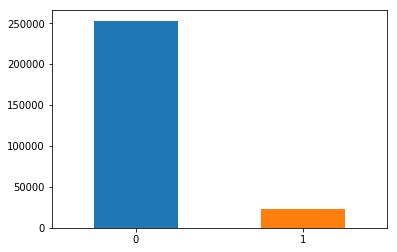

In [18]:
target_df.plot(kind='bar',rot=0)

print("% other ",(target_df[0]/clean_a_df.shape[0])*100)
print("% difficuties",(target_df[1]/clean_a_df.shape[0])*100)

Clearly there is an imbalance and hence balancing is required , because this graph is not showing under which category the difficulties are more

In [19]:
#Subtask 3.2


#Create seperate dataframes form target 1 and 0, and getnumber of records from other cases same as number of records with payment difficulties
   

target_class_1=clean_a_df.loc[clean_a_df['TARGET']==1]
target_class_0=clean_a_df.loc[clean_a_df['TARGET']==0].sample(n=int(target_df[1]),random_state=42)


In [20]:
#inspect target 0 dataframe
target_class_0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Age_binned,credit_amount_range,Income_amount_range
142844,265626,0,Cash loans,F,2,270000.0,651600.0,28831.5,562500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.014464,-14563,-2039,-77.0,-4941,1,0,THURSDAY,3,0.543561,0.537070,-494.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.000000,39,30-40,460000-690000,205000-300000
258105,398684,0,Cash loans,F,0,189000.0,238500.0,28305.0,238500.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,With parents,0.010006,-9443,-1414,-9422.0,-2107,1,0,WEDNESDAY,11,0.351030,NaN,-259.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,1.899974,25,20-30,230000-460000,105000-200000
271724,415007,0,Cash loans,M,0,211500.0,1024740.0,43416.0,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018850,-19074,-12341,-3696.0,-2451,1,1,WEDNESDAY,11,0.668752,0.753067,-1910.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.000000,52,50-60,920000-1150000,205000-300000
123104,242751,0,Cash loans,F,0,157500.0,675000.0,21775.5,675000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.030755,-13421,-395,-236.0,-4800,1,0,WEDNESDAY,14,0.665557,0.440058,-1765.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,7.0,0.0,5.000000,36,30-40,460000-690000,105000-200000
146656,270041,0,Cash loans,F,0,135000.0,502497.0,30051.0,454500.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.007330,-17890,-4776,-4727.0,-1426,1,0,WEDNESDAY,13,0.591857,0.506484,-1226.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.000000,49,40-50,460000-690000,105000-200000
165479,291831,0,Cash loans,F,0,171000.0,675000.0,32472.0,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.028663,-20161,365243,-8462.0,-3301,1,0,TUESDAY,9,0.693297,0.362277,-509.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.000000,55,50-60,460000-690000,105000-200000
304600,452901,0,Cash loans,M,1,234000.0,298467.0,32274.0,283500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072508,-10573,-694,-5118.0,-3254,1,0,SUNDAY,11,0.467928,0.221335,-68.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,28,20-30,230000-460000,205000-300000
154872,279518,0,Cash loans,M,0,135000.0,398160.0,25573.5,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,Rented apartment,0.032561,-15314,-229,-5324.0,-278,1,0,SATURDAY,18,0.397542,0.306202,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.000000,41,40-50,230000-460000,105000-200000
234665,371833,0,Cash loans,M,0,157500.0,333211.5,35883.0,279000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.005144,-21012,-4010,-6183.0,-4224,1,0,FRIDAY,13,0.464010,0.754406,-544.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.000000,57,50-60,230000-460000,105000-200000
306463,455066,0,Cash loans,F,1,90000.0,168102.0,17779.5,1

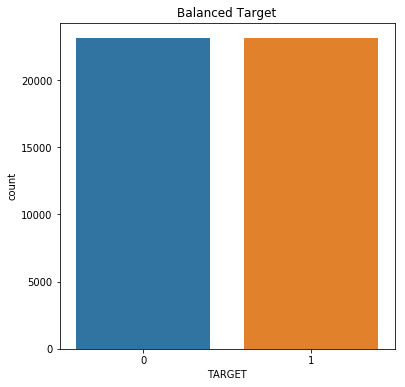

In [21]:
balance_df=pd.concat([target_class_1,target_class_0])

plt.figure(figsize=(6,6))
sns.countplot('TARGET',data=balance_df)
plt.title('Balanced Target')
plt.show()

# balanced data after processing

### Univariate Analysis using continuious variable

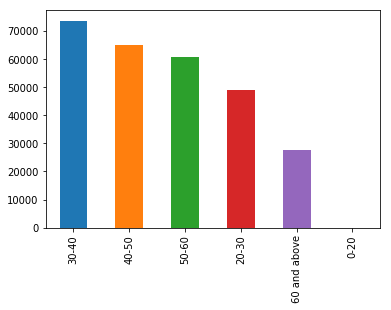

In [22]:
#Subtask 3.3 - Plot the bar graph of total people of different ages. clearly there are more people between 25 to 50 age group
clean_a_df['Age_binned'].value_counts().plot('bar')

Highest number of people have applied in the age group of 30 to 40

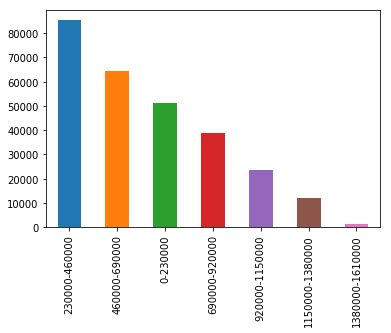

In [23]:
# maximum credit is taken between 0 to 500000

clean_a_df['credit_amount_range'].value_counts().plot('bar')

Maximum credit is applied in range of (230000 to 460000)

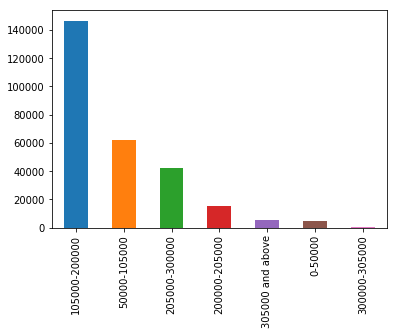

In [24]:
clean_a_df['Income_amount_range'].value_counts().plot('bar')

Maximum people income is in the range of (105000 to 20000), that means most people with mid range income has applied for loan

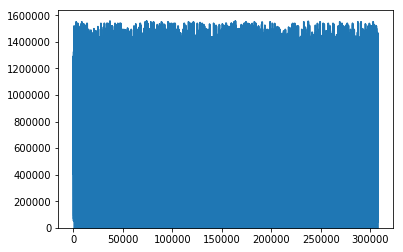

In [25]:
clean_a_df['AMT_CREDIT'].plot.area()

### Univariate Analysis using categorical Variable

            INCOME_TYPE  Total
0  Commercial associate   4751
1       Maternity leave      1
2             Pensioner   2829
3         State servant   1144
4            Unemployed      8
5               Working  14396 



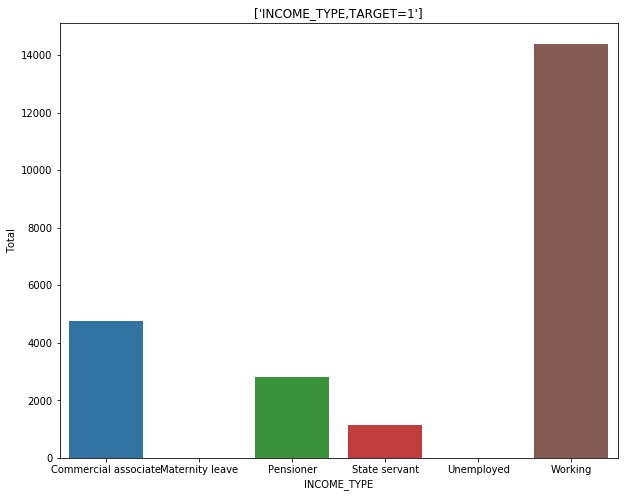

In [31]:
#Calculate the total count of each INCOME_TYPE which with TARGET value as 1
def get_df(col,col_rename,targetdf):
    freq_df=targetdf.groupby(col).size().reset_index(name='Total').rename(columns={col:col_rename})
    print(freq_df,"\n")
    return freq_df

def get_fre(col,col_rename,x,y,targetdf,targetnum,title):
    freq_df=get_df(col,col_rename,targetdf)
    plt.figure(figsize=(x,y))
    ax=sns.barplot(x=col_rename,y='Total',data=freq_df)
       
    plt.title([title])
    plt.show()

get_fre('NAME_INCOME_TYPE','INCOME_TYPE',10,8,target_class_1,1,'INCOME_TYPE,TARGET=1')

maximum of payment difficulties are from working people

            INCOME_TYPE  Total
0           Businessman      1
1  Commercial associate   5059
2             Pensioner   4453
3         State servant   1599
4               Student      1
5               Working  12016 



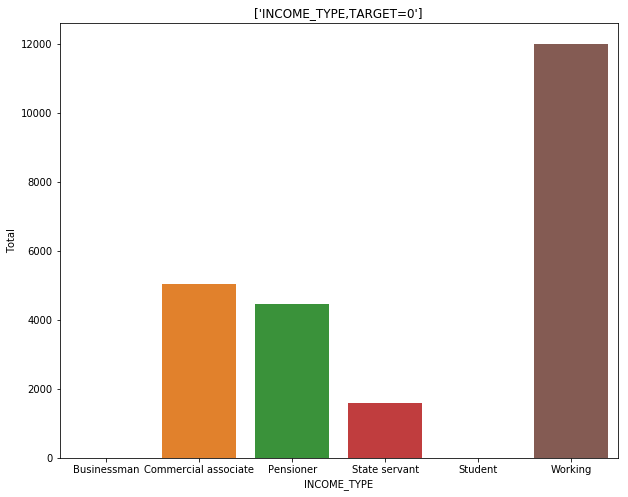

In [28]:
#Plot the graph of the count of the INCOME_TYPE which having TARGET value as 0
get_fre('NAME_INCOME_TYPE','INCOME_TYPE',10,8,target_class_0,0,'INCOME_TYPE,TARGET=0')

          FAMILY_STATUS  Total
0        Civil marriage   2800
1               Married  13704
2             Separated   1502
3  Single / not married   4225
4                 Widow    898 



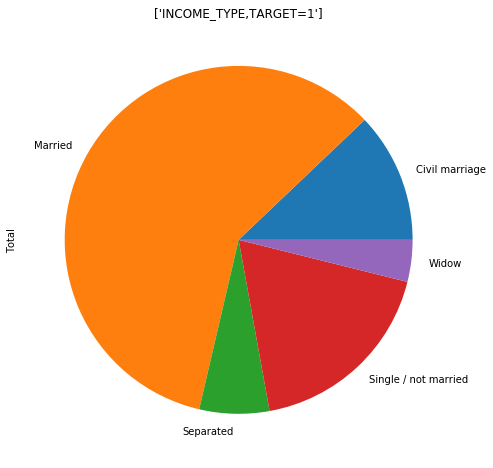

In [33]:
#Plot the pai-graph of the count of the INCOME_TYPE which having TARGET value as 1
freq_table2=get_df('NAME_FAMILY_STATUS','FAMILY_STATUS',target_class_1)
plt.figure(figsize=(8,8))
freq_table2['Total'].groupby(freq_table2.FAMILY_STATUS).sum().plot(kind="pie")
plt.title(['INCOME_TYPE,TARGET=1'])
plt.show()

          FAMILY_STATUS  Total
0        Civil marriage   2289
1               Married  14581
2             Separated   1526
3  Single / not married   3418
4                 Widow   1315 



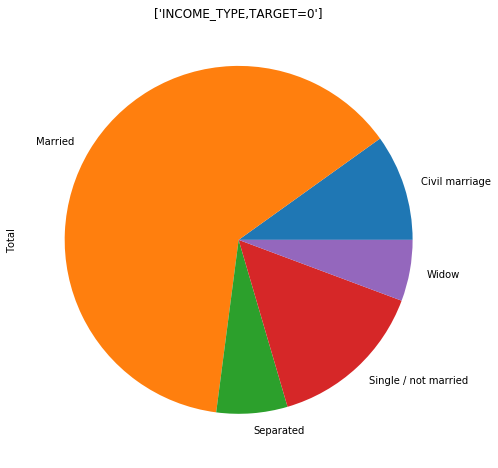

In [36]:
#Plot the pai-graph of the count of the INCOME_TYPE which having TARGET value as 0
freq_table2=get_df('NAME_FAMILY_STATUS','FAMILY_STATUS',target_class_0)
plt.figure(figsize=(8,8))
freq_table2['Total'].groupby(freq_table2.FAMILY_STATUS).sum().plot(kind="pie")
plt.title(['INCOME_TYPE,TARGET=0'])
plt.show()

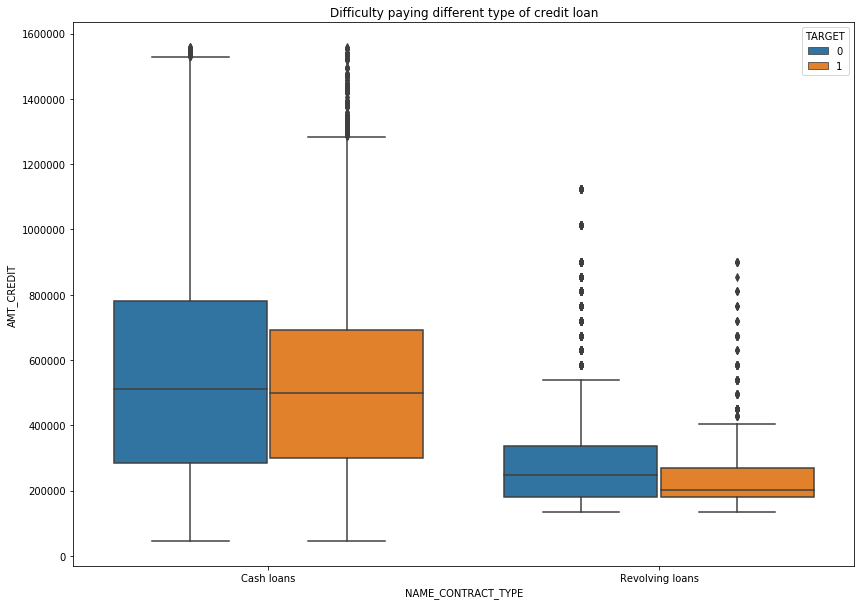

In [37]:
plt.figure(figsize=(14,10))

sns.boxplot(data=clean_a_df,x='NAME_CONTRACT_TYPE',y='AMT_CREDIT',hue='TARGET')
plt.title('Difficulty paying different type of credit loan')
plt.show()

In [43]:
#Subtask 3.4 Perform correlation between CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE and REGION_POPULATION_RELATIVE
#Then make correlation matrix

columns=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE']
corr=target_class_1[columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE
CNT_CHILDREN,1,-0.00536601,0.00527473,-0.00192535,-0.0308391
AMT_INCOME_TOTAL,-0.00536601,1,0.300632,0.300955,0.081046
AMT_CREDIT,0.00527473,0.300632,1,0.978329,0.0516046
AMT_GOODS_PRICE,-0.00192535,0.300955,0.978329,1,0.0604079
REGION_POPULATION_RELATIVE,-0.0308391,0.081046,0.0516046,0.0604079,1


Following is the observation from the correlation matrix with respect to Target=1 

A.AMT_GOODS_PRICE and AMT_CREDIT are high in correlation

B.below pairs of columns have Medium Correlation

1.REGION_POPULATION_RELATIVE and AMT_INCOME_TOTAL                                                                           
2.REGION_POPULATION_RELATIVE and AMT_GOODS_PRICE                                                         
3.REGION_POPULATION_RELATIVE and AMT_CREDIT

C.AMT_INCOME_TOTAL and CNT_CHILDREN have low correlation

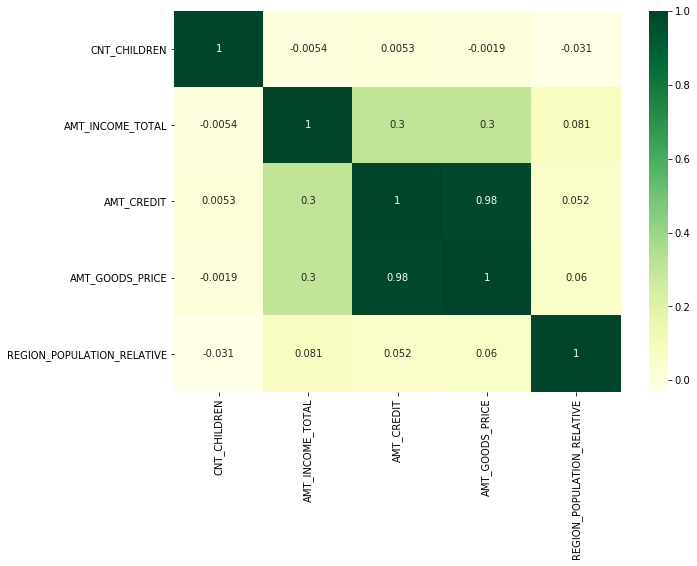

In [44]:
#Alternate view for better presentaion we have plot heat map between numerical columns corresponding to target=1.

plt.figure(figsize=(10,7))
sns.heatmap(target_class_1[columns].corr(), annot=True,cmap="YlGn")

Above fact is again clear from the heatmap

#### Now perform correlation between numerical columns for finding correlation which having TARGET value as 0

In [45]:
#Perform correlation between CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE and REGION_POPULATION_RELATIVE
#Then make correlation matrix

corr=target_class_0[columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE
CNT_CHILDREN,1,0.0293412,0.0148845,0.0107366,-0.0375062
AMT_INCOME_TOTAL,0.0293412,1,0.323096,0.324393,0.121926
AMT_CREDIT,0.0148845,0.323096,1,0.981905,0.0400333
AMT_GOODS_PRICE,0.0107366,0.324393,0.981905,1,0.0435098
REGION_POPULATION_RELATIVE,-0.0375062,0.121926,0.0400333,0.0435098,1


In the correlation matrix, we can identify-

Columns with High Correlation:

1.AMT_GOODS_PRICE and AMT_CREDIT

Columns with Medium Correlation:

1.AMT_INCOME_TOTAL and AMT_CREDIT
2.AMT_INCOME_TOTAL and AMT_GOODS_PRICE

Columns with low correlation:

1.AMT_GOODS_PRICE and CNT_CHILDREN

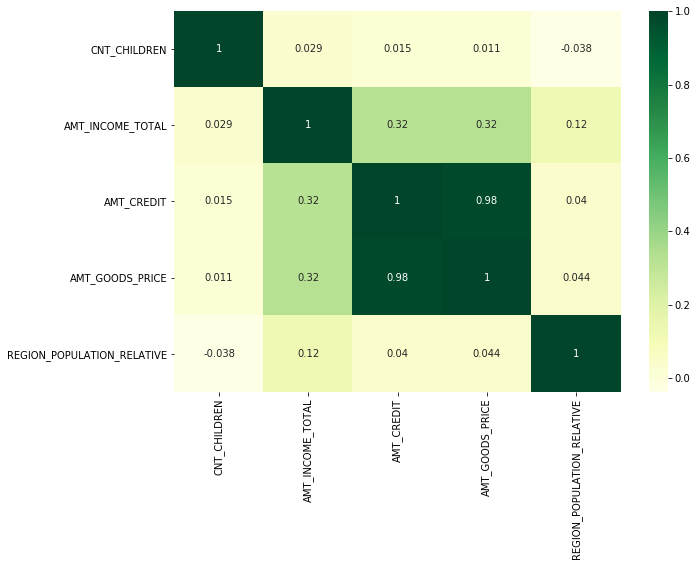

In [46]:
#For better presentaion and understanding we plot heat map between numerical columns.

plt.figure(figsize=(10,7))
sns.heatmap(target_class_0[columns].corr(), annot=True,cmap="YlGn")

#### The highest coorelation is similar for both the targets (Subtask 3.4)

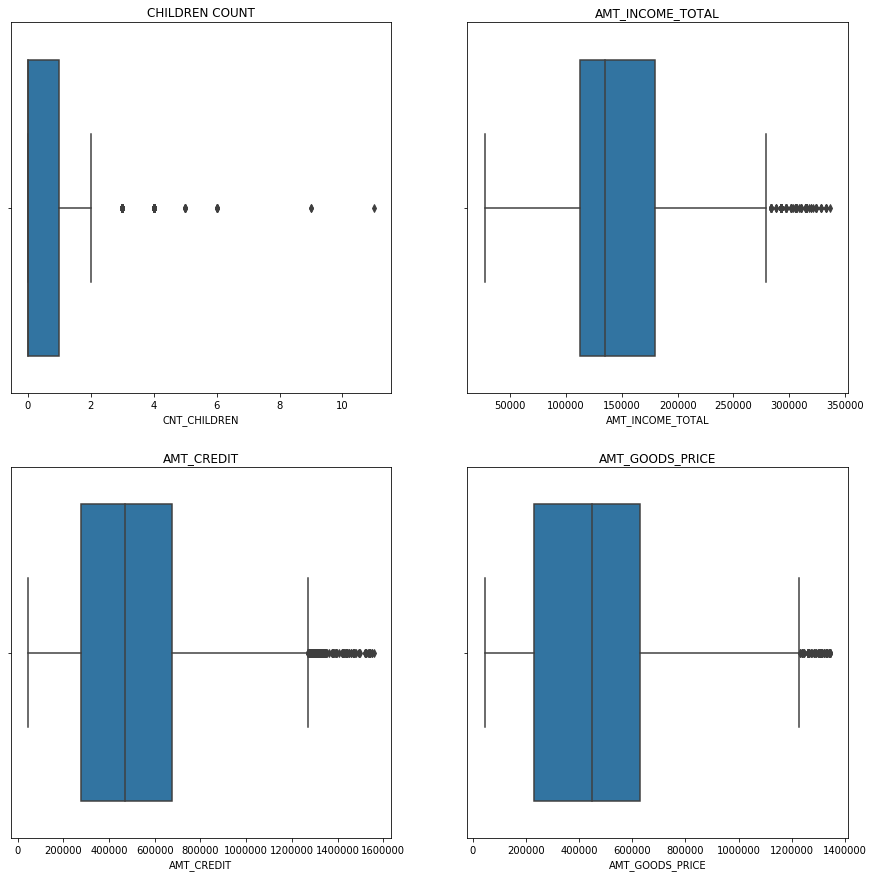

In [49]:
#Subtask 3.6 
#Univarient analysis- Box plot on the numerical columns having TARGET value as 1

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('CHILDREN COUNT')
sns.boxplot(target_class_1['CNT_CHILDREN'])


plt.subplot(2,2,2)
plt.title('AMT_INCOME_TOTAL')
sns.boxplot(target_class_1['AMT_INCOME_TOTAL'])


plt.subplot(2,2,3)
plt.title('AMT_CREDIT')
sns.boxplot(target_class_1['AMT_CREDIT'])

plt.subplot(2,2,4)
plt.title('AMT_GOODS_PRICE')
sns.boxplot(target_class_1['AMT_GOODS_PRICE'])


plt.show()

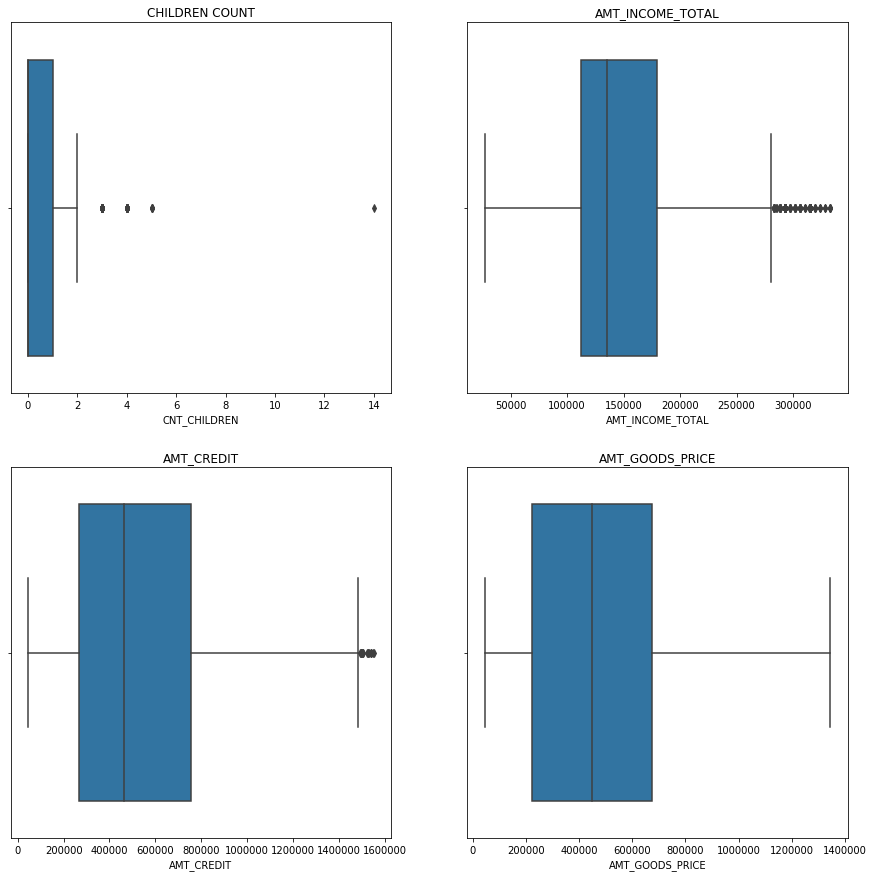

In [50]:
#Box plot on the numerical columns having TARGET value as 0

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('CHILDREN COUNT')
sns.boxplot(target_class_0['CNT_CHILDREN'])


plt.subplot(2,2,2)
plt.title('AMT_INCOME_TOTAL')
sns.boxplot(target_class_0['AMT_INCOME_TOTAL'])


plt.subplot(2,2,3)
plt.title('AMT_CREDIT')
sns.boxplot(target_class_0['AMT_CREDIT'])

plt.subplot(2,2,4)
plt.title('AMT_GOODS_PRICE')
sns.boxplot(target_class_0['AMT_GOODS_PRICE'])



plt.show()

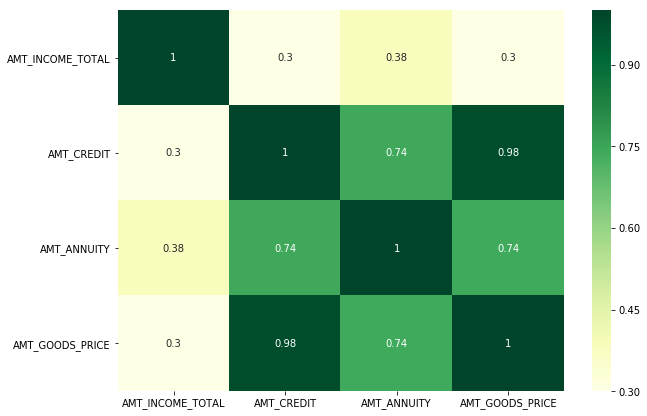

In [53]:
#Heat map on numerical column for TARGET as 1

plt.figure(figsize=(10,7))
col1=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
sns.heatmap(target_class_1[col1].corr(), annot=True,cmap="YlGn")

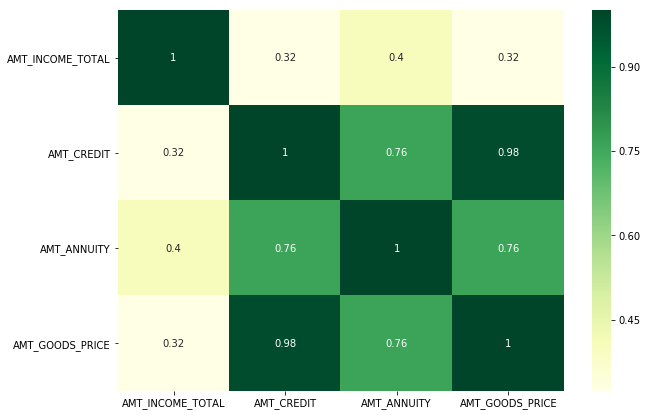

In [54]:
#Heat map on numerical column for TARGET as 0

plt.figure(figsize=(10,7))
col1=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
sns.heatmap(target_class_0[col1].corr(), annot=True,cmap="YlGn")

# PREVIOUS DATA

Read the dataset file previous_application.csv which consist previous loan of the customer.

In [55]:
prev_df=pd.read_csv("previous_application.csv")

prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Perform basic checks

In [56]:
prev_df.shape

(1670214, 37)

In [57]:
print(prev_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [58]:
#Check the null % for each column
print (round((prev_df.isnull().sum() * 100/ len(prev_df)),4).sort_values(ascending=False))

RATE_INTEREST_PRIVILEGED       99.6437
RATE_INTEREST_PRIMARY          99.6437
RATE_DOWN_PAYMENT              53.6365
AMT_DOWN_PAYMENT               53.6365
NAME_TYPE_SUITE                49.1198
DAYS_TERMINATION               40.2981
NFLAG_INSURED_ON_APPROVAL      40.2981
DAYS_FIRST_DRAWING             40.2981
DAYS_FIRST_DUE                 40.2981
DAYS_LAST_DUE_1ST_VERSION      40.2981
DAYS_LAST_DUE                  40.2981
AMT_GOODS_PRICE                23.0818
AMT_ANNUITY                    22.2867
CNT_PAYMENT                    22.2864
PRODUCT_COMBINATION             0.0207
AMT_CREDIT                      0.0001
SK_ID_CURR                      0.0000
NAME_CONTRACT_TYPE              0.0000
WEEKDAY_APPR_PROCESS_START      0.0000
HOUR_APPR_PROCESS_START         0.0000
FLAG_LAST_APPL_PER_CONTRACT     0.0000
NFLAG_LAST_APPL_IN_DAY          0.0000
AMT_APPLICATION                 0.0000
NAME_PAYMENT_TYPE               0.0000
NAME_CASH_LOAN_PURPOSE          0.0000
NAME_CONTRACT_STATUS     

In [59]:
#Remove columns with higher null percentage (>50%))
cols_50_per_null=prev_df.columns[prev_df.isnull().mean() > 0.50]
clean_p_df = prev_df.drop(cols_50_per_null, axis = 1)

clean_p_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [66]:
#Check the percentage again after deleting higher percentage
print (round((clean_p_df.isnull().sum() * 100/ len(clean_p_df)),4).sort_values(ascending=False))

NAME_TYPE_SUITE                49.1198
DAYS_FIRST_DUE                 40.2981
DAYS_TERMINATION               40.2981
DAYS_FIRST_DRAWING             40.2981
NFLAG_INSURED_ON_APPROVAL      40.2981
DAYS_LAST_DUE_1ST_VERSION      40.2981
DAYS_LAST_DUE                  40.2981
AMT_GOODS_PRICE                23.0818
AMT_ANNUITY                    22.2867
CNT_PAYMENT                    22.2864
PRODUCT_COMBINATION             0.0207
AMT_CREDIT                      0.0001
NAME_CASH_LOAN_PURPOSE          0.0000
SK_ID_CURR                      0.0000
NAME_CONTRACT_TYPE              0.0000
AMT_APPLICATION                 0.0000
WEEKDAY_APPR_PROCESS_START      0.0000
HOUR_APPR_PROCESS_START         0.0000
FLAG_LAST_APPL_PER_CONTRACT     0.0000
NFLAG_LAST_APPL_IN_DAY          0.0000
DAYS_DECISION                   0.0000
NAME_CONTRACT_STATUS            0.0000
NAME_PAYMENT_TYPE               0.0000
CODE_REJECT_REASON              0.0000
NAME_CLIENT_TYPE                0.0000
NAME_GOODS_CATEGORY      

## Merge actual and previous datasets

In [67]:
#merging datasets
merged_df = clean_a_df.merge(clean_p_df, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

Perform basic checks

In [68]:
print(merged_df.shape)

(1274845, 88)


In [69]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274845 entries, 0 to 1274844
Data columns (total 88 columns):
SK_ID_CURR                      1274845 non-null int64
TARGET                          1274845 non-null int64
NAME_CONTRACT_TYPE_x            1274845 non-null object
CODE_GENDER                     1274845 non-null object
CNT_CHILDREN                    1274845 non-null int64
AMT_INCOME_TOTAL                1274845 non-null float64
AMT_CREDIT_x                    1274845 non-null float64
AMT_ANNUITY_x                   1274845 non-null float64
AMT_GOODS_PRICE_x               1274845 non-null float64
NAME_TYPE_SUITE_x               1272714 non-null object
NAME_INCOME_TYPE                1274845 non-null object
NAME_EDUCATION_TYPE             1274845 non-null object
NAME_FAMILY_STATUS              1274845 non-null object
NAME_HOUSING_TYPE               1274845 non-null object
REGION_POPULATION_RELATIVE      1274845 non-null float64
DAYS_BIRTH                      1274845 non-n

In [70]:
merged_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Age_binned,credit_amount_range,Income_amount_range,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,WEDNESDAY,10,0.262949,0.139376,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.000000,25,20-30,230000-460000,200000-205000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,MONDAY,11,0.622246,NaN,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,45,40-50,1150000-1380000,205000-300000,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,MONDAY,11,0.622246,NaN,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,45,40-50,1150000-1380000,205000-300000,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,MONDAY,11,0.622246,NaN,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,45,40-50,1150000-1380000,205000-300000,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-190

##  Merged data - Univariate Analysis

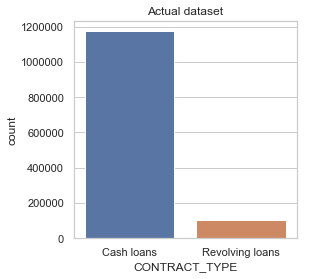

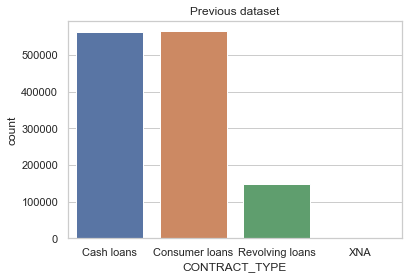

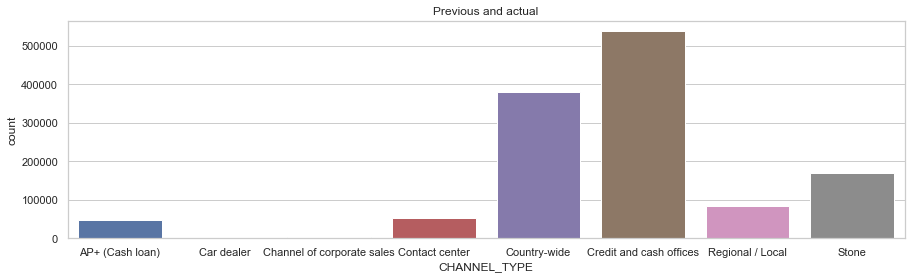

In [71]:
### Create function to plot the bar chart based on different columns

def plot_pre_act(col1,col1_rename,title,figsz1,figsz2):
    freq_df1=merged_df.groupby([col1]).size().reset_index(name='count').rename(columns={col1:col1_rename})
    plt.figure(figsize=(figsz1,figsz2))
    sns.set(style="whitegrid")
    ax=sns.barplot(x=col1_rename,y='count',data=freq_df1)
    plt.title(title)
    plt.show()

plot_pre_act('NAME_CONTRACT_TYPE_x','CONTRACT_TYPE',"Actual dataset",4,4)
plot_pre_act('NAME_CONTRACT_TYPE_y','CONTRACT_TYPE',"Previous dataset",6,4)
plot_pre_act('CHANNEL_TYPE','CHANNEL_TYPE',"Previous and actual",15,4)

In [73]:
#function to plot the graphs for previous and against together

def plot_merged(df,col_name,y_col,hori_layout=True,lbl_rotate=False,):
    cnt = df[col_name].value_counts()
    df1 = pd.DataFrame({col_name: cnt.index,'Number of contracts': cnt.values})

    # Calculate the percentage of target=1 per category value
    col_per = df[[col_name, 'TARGET']].groupby([col_name],as_index=False).mean()
    #print(col_per)
    col_per.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(hori_layout):
        fig, (x1, x2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (x1, x2) = plt.subplots(nrows=2, figsize=(12,14))
    
    sns.set_color_codes("pastel")
    
    s = sns.barplot(ax=x1, x = col_name, y=y_col,data=df1)
    
    if(lbl_rotate):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=x2, x = col_name, y='TARGET', order=col_per[col_name], data=col_per)
    if(lbl_rotate):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();



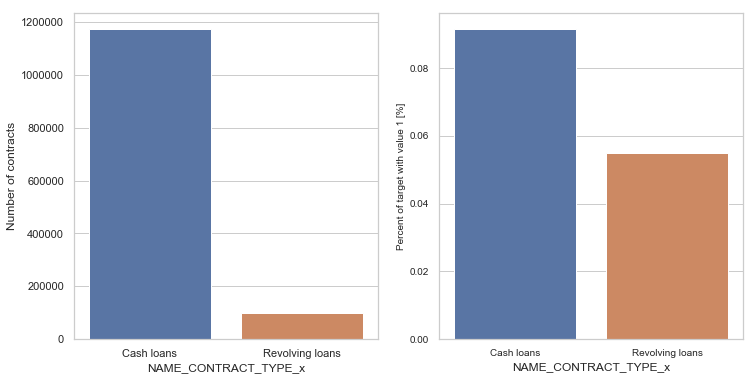

In actual data the revolving loans are small amount compared to Cash loans but the % of non payment for the revolving loans are comapritvely high.


In [74]:
plot_merged(merged_df,'NAME_CONTRACT_TYPE_x',"Number of contracts")
print("In actual data the revolving loans are small amount compared to Cash loans but the % of non payment for the revolving loans are comapritvely high.")


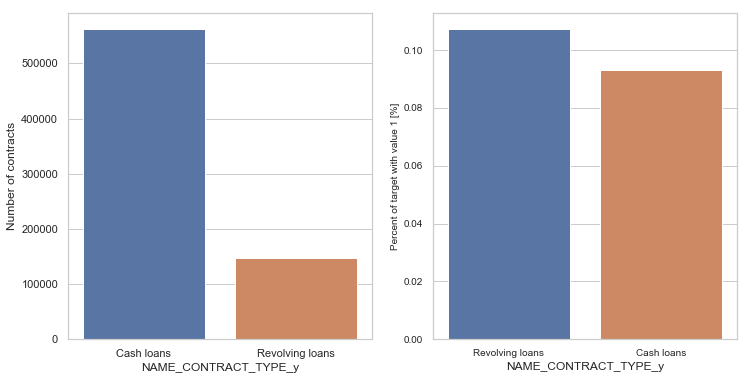

In [75]:
filtered_df = merged_df[ (merged_df['NAME_CONTRACT_TYPE_y'] != 'XNA') & (merged_df['NAME_CONTRACT_TYPE_y'] != 'Consumer loans')]# & (merged_df['NAME_CONTRACT_TYPE_y'] == 'Revolving loans')]

plot_merged(filtered_df,'NAME_CONTRACT_TYPE_y',"Number of contracts")

Previous the revolving loans are small amount compared to Cash loans but the % of non payment for the revolving loans are clearly higher than cash loan

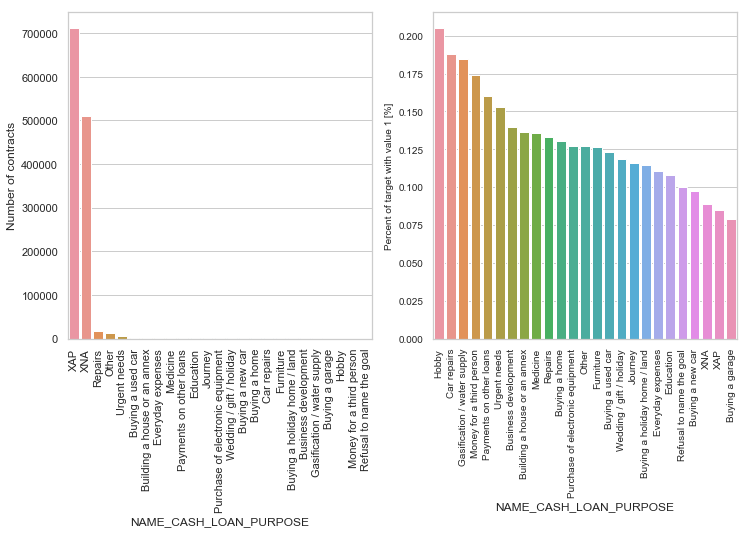

In [76]:
plot_merged(merged_df,'NAME_CASH_LOAN_PURPOSE', "Number of contracts",True, True)

Highest purpose of cash loan is refusal to name the goal and hobby

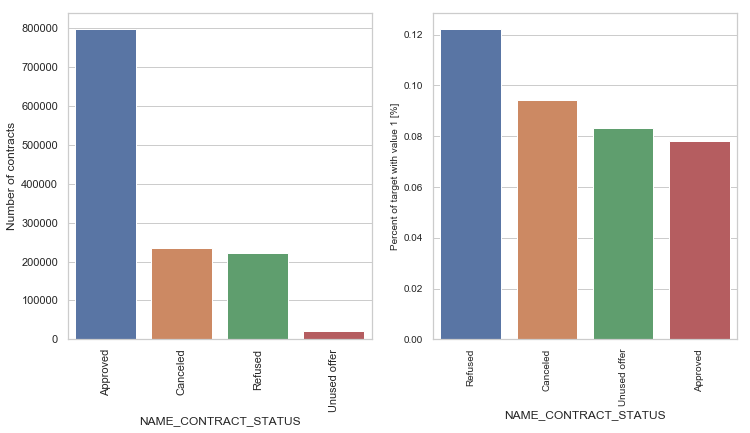

In [77]:
plot_merged(merged_df,'NAME_CONTRACT_STATUS',"Number of contracts", True, True)

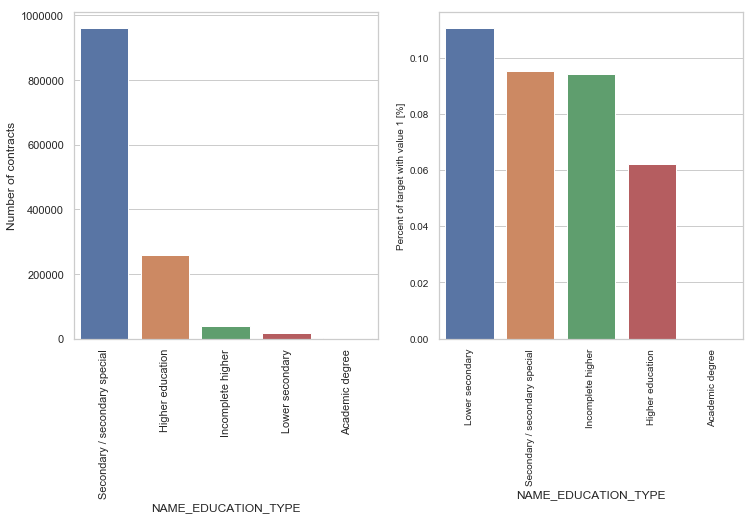

In [78]:
plot_merged(merged_df,'NAME_EDUCATION_TYPE',"Number of contracts", True, True)

Higher the education higher is the repayment rate

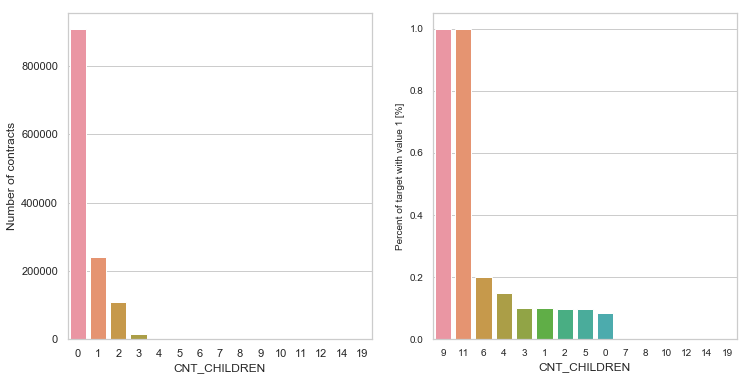

In [79]:
plot_merged(merged_df,'CNT_CHILDREN',"Number of contracts")

We can see that irrespective of childeren upto 5 the % of non-payment is close but there is a difference for people with 4 and 6 kids

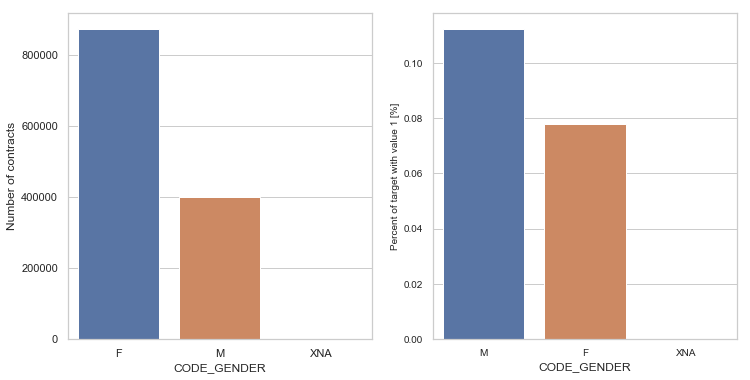

In [80]:
plot_merged(merged_df,'CODE_GENDER',"Number of contracts")

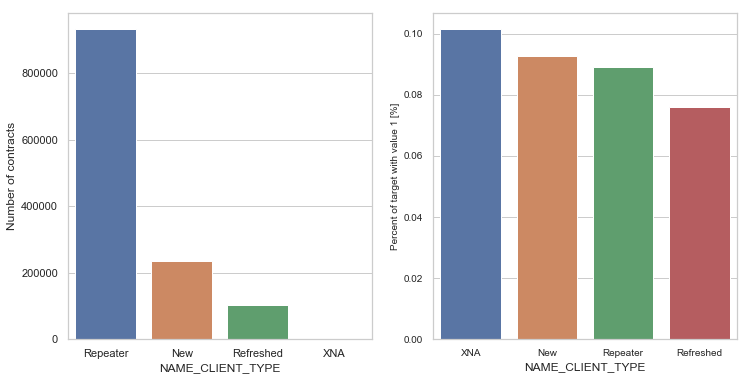

In [81]:
plot_merged(merged_df,'NAME_CLIENT_TYPE',"Number of contracts")

##  Merged data -  Bivariate Analysis

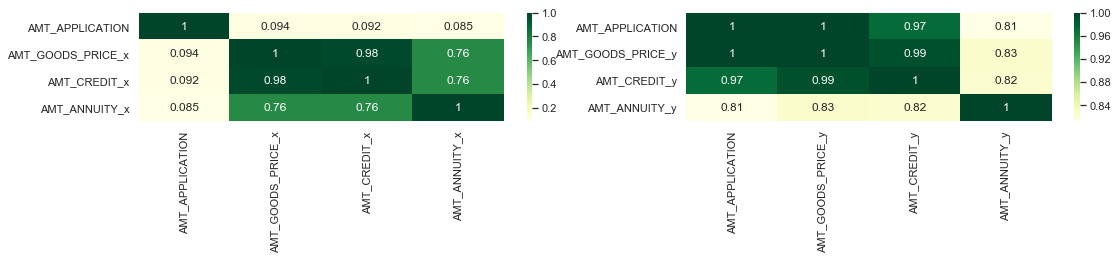

In [82]:
#Actual dataset
plt.figure(figsize=(18,2))
plt.subplot(1,2,1)
col1=['AMT_APPLICATION','AMT_GOODS_PRICE_x','AMT_CREDIT_x','AMT_ANNUITY_x']
sns.heatmap(merged_df[col1].corr(), annot=True,cmap="YlGn")

#Previous dataset
plt.subplot(1,2,2)
col1=['AMT_APPLICATION','AMT_GOODS_PRICE_y','AMT_CREDIT_y','AMT_ANNUITY_y']
sns.heatmap(merged_df[col1].corr(), annot=True,cmap="YlGn")

The overall coorelation is similar in both the data set 

In [83]:
corr_columns=['AMT_APPLICATION','AMT_GOODS_PRICE_x','AMT_CREDIT_x','AMT_ANNUITY_x']

corr=merged_df[corr_columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,AMT_APPLICATION,AMT_GOODS_PRICE_x,AMT_CREDIT_x,AMT_ANNUITY_x
AMT_APPLICATION,1,0.0939841,0.092108,0.0848756
AMT_GOODS_PRICE_x,0.0939841,1,0.981932,0.755885
AMT_CREDIT_x,0.092108,0.981932,1,0.756845
AMT_ANNUITY_x,0.0848756,0.755885,0.756845,1


Stats of actual dataset

In [84]:

corr_columns=['AMT_APPLICATION','AMT_GOODS_PRICE_y','AMT_CREDIT_y','AMT_ANNUITY_y']

corr=merged_df[corr_columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,AMT_APPLICATION,AMT_GOODS_PRICE_y,AMT_CREDIT_y,AMT_ANNUITY_y
AMT_APPLICATION,1,0.999858,0.973336,0.811593
AMT_GOODS_PRICE_y,0.999858,1,0.992813,0.826246
AMT_CREDIT_y,0.973336,0.992813,1,0.823708
AMT_ANNUITY_y,0.811593,0.826246,0.823708,1


Stats of previous dataset

##### The coorelation between AMT_GOODS_PRICE and AMT_APPLICATION are much higher in previous year.

##### This means that the client ask for more credit in previous application whcih has been considered compare to new applications.
##### This also indicates that the policy is improved to limit the credits

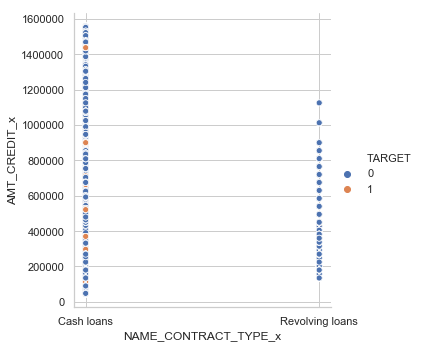

In [85]:
#Plot relative graph for actual data
 
sns.relplot(x="NAME_CONTRACT_TYPE_x", y="AMT_CREDIT_x",hue="TARGET", data=merged_df)

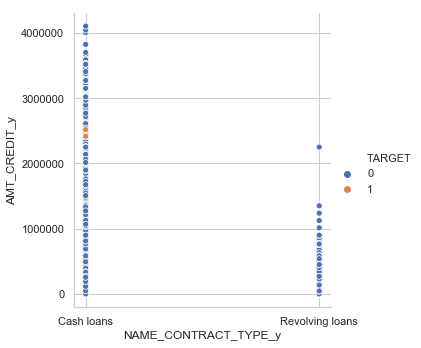

In [86]:
#Plot relative graph for previous data , remove few contract types from previous data as it skews the graph
filtered_df = merged_df[ (merged_df['NAME_CONTRACT_TYPE_y'] != 'XNA') & (merged_df['NAME_CONTRACT_TYPE_y'] != 'Consumer loans')]# & (merged_df['NAME_CONTRACT_TYPE_y'] == 'Revolving loans')]

sns.relplot(x="NAME_CONTRACT_TYPE_y", y="AMT_CREDIT_y",hue="TARGET", data=filtered_df)

###### Above shows that the overall credit amount has increaed drastically in actual data

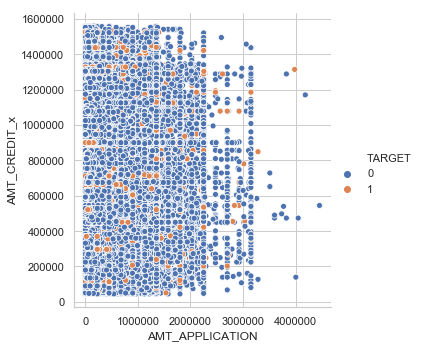

In [87]:
sns.relplot(x='AMT_APPLICATION', y="AMT_CREDIT_x",hue="TARGET",data=merged_df)

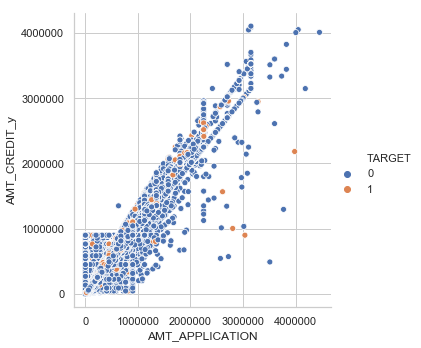

In [88]:
sns.relplot(x='AMT_APPLICATION', y="AMT_CREDIT_y",hue="TARGET",data=merged_df)

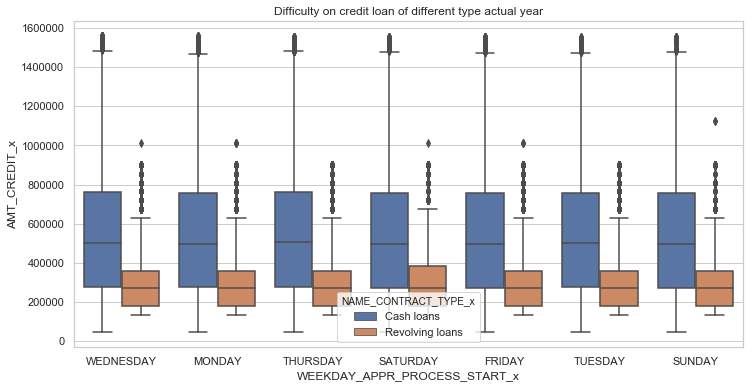

In [89]:
#filtered_df = merged_df[(merged_df['TARGET'] == 1)]

plt.figure(figsize=(12,6))

sns.boxplot(data=merged_df,x='WEEKDAY_APPR_PROCESS_START_x',y='AMT_CREDIT_x',hue='NAME_CONTRACT_TYPE_x')
plt.title('Difficulty on credit loan of different type actual year')
plt.show()

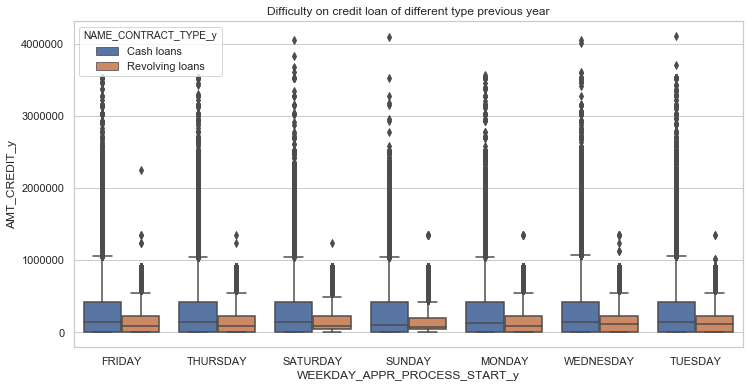

In [90]:
filtered_df = merged_df[ (merged_df['NAME_CONTRACT_TYPE_y'] != 'XNA') & (merged_df['NAME_CONTRACT_TYPE_y'] != 'Consumer loans')]# & (merged_df['NAME_CONTRACT_TYPE_y'] == 'Revolving loans')]
 
plt.figure(figsize=(12,6))

sns.boxplot(data=filtered_df,x='WEEKDAY_APPR_PROCESS_START_y',y='AMT_CREDIT_y',hue='NAME_CONTRACT_TYPE_y')
plt.title('Difficulty on credit loan of different type previous year')
plt.show()

# Conclusion

This case study aims to identify the defaulters and non-defaulters and develop a basic understanding of risk analytics in banking and financial services and understand how data is used to mini-mise the risk of losing money while lending to customers. After our Analysis on the dataset we accept following key points:

###### 1-Customers repeating are not likely to face payment issues because the credit is well balanced against AMT_APPLICATION.
###### 2-No coorelation found between customers FAMILY_STATUS and the likelyhood of paying the loan.
###### 3-Returning customers have chance to get higher credit.
###### 4-Customers with age between 25-30 are unlikely to be defaulter.
###### 5-Customer with low income(0-5 lakh) are those who applied for the loan.
###### 6-Working customers loan is approved most of the time while student and unemployed customers loan application is rejected mostly.
###### 7-Most of the customers have used credit and cash medium in their loan.
###### 8-Thursday and Wednesday are most busiest day for the company so it is recommended that they increase their productivity on these weekdays.
###### 9-Most of the customer applied consumer and cash loan which share approx. equal number of approval and disapproval.
###### 10-Customers who provide half number of required documents are facing issue in their loan approval and customer who provide all the documents are get their approval immediately.
###### 11- % of non payment for the revolving loans are comapritvely high.